In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("Downloads/Algerian_forest_fires_dataset_UPDATE.csv", skiprows=1)

In [3]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [5]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,246,245,245,245,245,245,245,245,245,245,245,245,245,244
unique,33,5,2,20,63,19,40,174,167,199,107,175,128,9
top,01,07,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131


In [6]:
df.shape

(246, 14)

In [7]:
df[df.duplicated()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [8]:
df.day.str.isnumeric().sum()

244

In [9]:
df[~df['day'].str.isnumeric()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [10]:
df=df.drop(df.index[[122,123]])

In [11]:
df.shape

(244, 14)

In [68]:
df["day"]=df["day"].astype(int)

In [13]:
df["day"].dtype

dtype('int32')

In [14]:
df["month"].str.isnumeric().sum()

244

In [69]:
df["month"]=df["month"].astype(float)

In [16]:
df["month"].dtype

dtype('float64')

In [70]:
df["year"].str.isnumeric().sum()

AttributeError: Can only use .str accessor with string values!

In [71]:
df["year"]=df["year"].astype(float)

In [19]:
df["Temperature"].str.isnumeric().sum()

244

In [13]:
df["Temperature"]=df["Temperature"].astype(float)

In [16]:
df[df["FFMC"].str.isnumeric()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
11,12,06,2012,26.0,81,19,0,84,13.8,61.4,4.8,17.7,7.1,fire
12,13,06,2012,27.0,84,21,1.2,50,6.7,17,0.5,6.7,0.2,not fire
13,14,06,2012,30.0,78,20,0.5,59,4.6,7.8,1,4.4,0.4,not fire
20,21,06,2012,30.0,78,14,0,81,6.3,31.6,2.6,8.4,2.2,fire
26,27,06,2012,34.0,53,18,0,89,21.6,80.3,9.2,25.8,15,fire
35,06,07,2012,32.0,63,14,0,87,10.9,37,5.6,12.5,6.8,fire
36,07,07,2012,35.0,64,18,0.2,80,9.7,40.4,2.8,12.1,3.2,not fire
53,24,07,2012,28.0,78,16,0.1,70,9.6,79.7,1.4,14.7,1.3,not fire
62,02,08,2012,35.0,55,12,0.4,78,5.8,10,1.7,5.5,0.8,not fire
64,04,08,2012,34.0,69,13,0,85,8.2,19.8,4,8.2,3.9,fire


In [15]:
df[~df[''].str.isnumeric()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29.0,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29.0,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26.0,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25.0,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27.0,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30.0,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28.0,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27.0,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24.0,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [17]:
df["FFMC"]=df["FFMC"].astype(float)

In [65]:
df["DMC"].str.isnumeric().sum()

26

In [66]:
df[~df["DMC"].str.isnumeric()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,03,06,2012,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
5,06,06,2012,31.0,67.0,14.0,0.0,82.6,5.8,22.2,3.1,7.0,2.5,fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,25,09,2012,28.0,70.0,15.0,0.0,79.9,13.8,36.1,2.4,14.1,3.0,not fire
240,27,09,2012,28.0,87.0,15.0,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire
241,28,09,2012,27.0,87.0,29.0,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
242,29,09,2012,24.0,54.0,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


ValueError: could not convert string to float: 'not fire   '

In [18]:
df["DC"].str.isnumeric().sum()

27

In [23]:
df[~df["DC"].str.isnumeric()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29.0,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29.0,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26.0,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25.0,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27.0,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,25,09,2012,28.0,70,15,0,79.9,13.8,36.1,2.4,14.1,3,not fire
241,26,09,2012,30.0,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
243,28,09,2012,27.0,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24.0,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [25]:
df["DC"]=df["DC"].replace('14.6 9','14.69')

In [26]:
df["DC"]=df["DC"].astype(float)

In [27]:
df["ISI"].str.isnumeric().sum()

30

In [28]:
df[~df["ISI"].str.isnumeric()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29.0,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
2,03,06,2012,26.0,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
4,05,06,2012,27.0,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
5,06,06,2012,31.0,67,14,0,82.6,5.8,22.2,3.1,7,2.5,fire
6,07,06,2012,33.0,54,13,0,88.2,9.9,30.5,6.4,10.9,7.2,fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30.0,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28.0,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,not fire
243,28,09,2012,27.0,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24.0,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [29]:
df["ISI"]=df["ISI"].astype(float)

In [30]:
df["BUI"].str.isnumeric().sum()

22

In [31]:
df[~df["BUI"].str.isnumeric()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29.0,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29.0,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,03,06,2012,26.0,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25.0,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire
4,05,06,2012,27.0,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30.0,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28.0,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,not fire
243,28,09,2012,27.0,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24.0,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [32]:
df["BUI"]=df["BUI"].astype(float)

In [34]:
df["FWI"].str.isnumeric().sum()

28

In [35]:
df[~df["FWI"].str.isnumeric()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29.0,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29.0,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,03,06,2012,26.0,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
4,05,06,2012,27.0,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
5,06,06,2012,31.0,67,14,0,82.6,5.8,22.2,3.1,7.0,2.5,fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,24,09,2012,26.0,49,6,2,61.3,11.9,28.1,0.6,11.9,0.4,not fire
241,26,09,2012,30.0,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
243,28,09,2012,27.0,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24.0,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [40]:
df["FWI"]=df["FWI"].replace('fire   ', ' 0')

In [41]:
df["FWI"]=df["FWI"].astype(float)

In [56]:
df[" RH"].str.isnumeric().sum()

244

In [57]:
df[" RH"]=df[" RH"].astype(float)

In [58]:
df[" Ws"].str.isnumeric().sum()

244

In [59]:
df[" Ws"]=df[" Ws"].astype(float)

In [60]:
df["Rain "].str.isnumeric().sum()

140

In [62]:
df[~df["Rain "].str.isnumeric()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
1,02,06,2012,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,03,06,2012,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
8,09,06,2012,25.0,88.0,13.0,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire
12,13,06,2012,27.0,84.0,21.0,1.2,50.0,6.7,17.0,0.5,6.7,0.2,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,20,09,2012,34.0,58.0,13.0,0.2,79.5,18.7,88.0,2.1,24.4,3.8,not fire
240,27,09,2012,28.0,87.0,15.0,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire
241,28,09,2012,27.0,87.0,29.0,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
242,29,09,2012,24.0,54.0,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [63]:
df["Rain "]=df["Rain "].astype(float)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int32  
 1   month        244 non-null    float64
 2   year         244 non-null    float64
 3   Temperature  244 non-null    float64
 4    RH          244 non-null    float64
 5    Ws          244 non-null    float64
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      243 non-null    object 
dtypes: float64(12), int32(1), object(1)
memory usage: 25.9+ KB


In [78]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [73]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
dtype: int64

In [74]:
df.corr()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
day,1.000000e+00,2.232788e-17,NaN,0.095772,-0.074209,0.047001,-0.112265,0.224032,0.491571,0.527930,0.177727,0.517229,0.350882
month,2.232788e-17,1.000000e+00,NaN,-0.059017,-0.037884,-0.041447,0.035322,0.015577,0.068178,0.127669,0.061680,0.085822,0.084201
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,9.577222e-02,-5.901677e-02,NaN,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370511,0.607551,0.455504,0.558393
RH,-7.420934e-02,-3.788419e-02,NaN,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220344,-0.690637,-0.348587,-0.569997
Ws,4.700086e-02,-4.144673e-02,NaN,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076253,0.015248,0.029756,0.028799
Rain,-1.122654e-01,3.532207e-02,NaN,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296808,-0.347105,-0.299171,-0.322682
FFMC,2.240321e-01,1.557668e-02,NaN,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503919,0.739730,0.589652,0.686033
DMC,4.915710e-01,6.817778e-02,NaN,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875362,0.674499,0.982073,0.874778
DC,5.279300e-01,1.276691e-01,NaN,0.370511,-0.220344,0.076253,-0.296808,0.503919,0.875362,1.000000,0.498926,0.941906,0.740186


<AxesSubplot:>

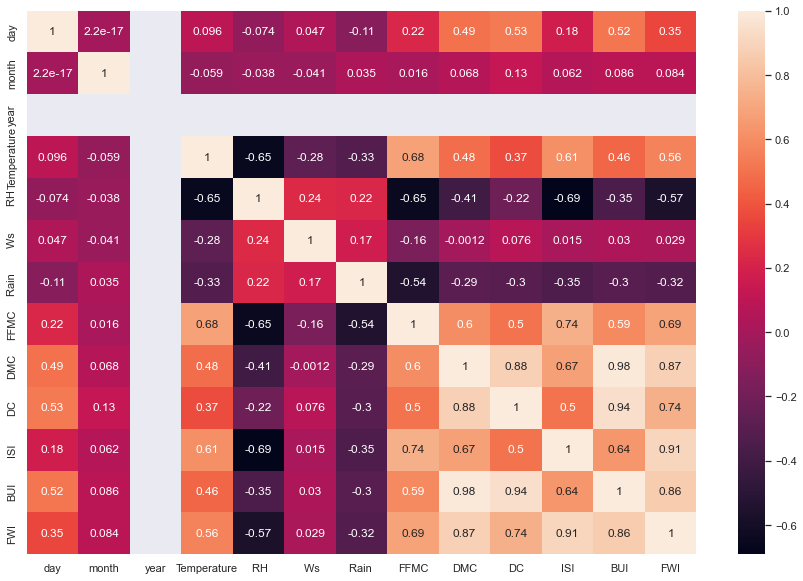

In [75]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(df.corr(), annot=True)

In [81]:
df.drop(columns=["Classes  "], inplace=True)

In [82]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,1,6.0,2012.0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,2,6.0,2012.0,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,3,6.0,2012.0,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,4,6.0,2012.0,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,5,6.0,2012.0,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9.0,2012.0,30.0,65.0,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5
240,27,9.0,2012.0,28.0,87.0,15.0,4.4,41.1,6.5,8.0,0.1,6.2,0.0
241,28,9.0,2012.0,27.0,87.0,29.0,0.5,45.9,3.5,7.9,0.4,3.4,0.2
242,29,9.0,2012.0,24.0,54.0,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0.7


In [83]:
## Divide the independent and dependent feature
X=df.drop(columns=["Temperature"])
y=df["Temperature"]

In [84]:
X

,day,month,year,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,1,6.0,2012.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,2,6.0,2012.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,3,6.0,2012.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,4,6.0,2012.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,5,6.0,2012.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9.0,2012.0,65.0,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5
240,27,9.0,2012.0,87.0,15.0,4.4,41.1,6.5,8.0,0.1,6.2,0.0
241,28,9.0,2012.0,87.0,29.0,0.5,45.9,3.5,7.9,0.4,3.4,0.2
242,29,9.0,2012.0,54.0,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0.7


In [85]:
y

0      29.0
1      29.0
2      26.0
3      25.0
4      27.0
       ... 
239    30.0
240    28.0
241    27.0
242    24.0
243    24.0
Name: Temperature, Length: 244, dtype: float64

In [86]:
## split the train and test data
from sklearn.model_selection import train_test_split

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [88]:
X_train

,day,month,year,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
114,23,9.0,2012.0,54.0,11.0,0.5,73.7,7.9,30.4,1.2,9.6,0.7
65,5,8.0,2012.0,65.0,13.0,0.0,86.8,11.1,29.7,5.2,11.5,6.1
132,11,6.0,2012.0,42.0,21.0,0.0,90.6,18.2,30.5,13.4,18.0,16.7
207,25,8.0,2012.0,40.0,18.0,0.0,92.1,56.3,157.5,14.3,59.5,31.1
162,11,7.0,2012.0,56.0,15.0,2.9,74.8,7.1,9.5,1.6,6.8,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...
106,15,9.0,2012.0,82.0,15.0,0.4,44.9,0.9,7.3,0.2,1.4,0.0
14,15,6.0,2012.0,80.0,17.0,3.1,49.4,3.0,7.4,0.4,3.0,0.1
92,1,9.0,2012.0,76.0,17.0,7.2,46.0,1.3,7.5,0.2,1.8,0.1
179,28,7.0,2012.0,57.0,16.0,0.0,87.5,15.7,37.6,6.7,15.7,9.0


In [89]:
X_train.shape

(163, 12)

In [90]:
X_test.shape

(81, 12)

# feature engineering

In [92]:
## standardization
from sklearn.preprocessing import StandardScaler   ### mean=0, std=1

In [93]:
scaler=StandardScaler() ## created an object

In [94]:
scaler

StandardScaler()

In [95]:
X_train=scaler.fit_transform(X_train)

In [96]:
X_test=scaler.transform(X_test) ### fit is not used to avoid data leakage, model should not learn X_train data

In [97]:
X_train

array([[ 0.84447703,  1.3826723 ,  0.        , ..., -0.80014076,
        -0.47763563, -0.8196431 ],
       [-1.19310159,  0.48116996,  0.        , ...,  0.16132584,
        -0.3471914 , -0.08219052],
       [-0.51390872, -1.32183472,  0.        , ...,  2.13233237,
         0.09906517,  1.36540157],
       ...,
       [-1.64589683,  1.3826723 ,  0.        , ..., -1.04050741,
        -1.01314351, -0.90158227],
       [ 1.41047108, -0.42033238,  0.        , ...,  0.52187581,
        -0.058841  ,  0.31384882],
       [-0.51390872,  1.3826723 ,  0.        , ..., -0.82417743,
        -0.9719506 , -0.87426921]])

In [98]:
X_test

array([[ 1.07087465e+00, -1.32183472e+00,  0.00000000e+00,
         7.66765714e-02, -1.92291688e-01, -3.94361879e-01,
         6.76854493e-01, -3.05224430e-02,  3.01184828e-01,
         2.81509163e-01,  1.19661624e-01,  2.31909648e-01],
       [-9.66703963e-01, -1.32183472e+00,  0.00000000e+00,
        -6.02577838e-01, -9.38566574e-01, -3.94361879e-01,
         7.79312965e-01, -3.70096733e-01, -3.74297004e-01,
         4.49765818e-01, -3.88384315e-01,  6.80312985e-02],
       [-1.53269802e+00, -4.20332380e-01,  0.00000000e+00,
        -1.01013048e+00,  1.80845755e-01, -3.94361879e-01,
         7.38329576e-01, -5.28038264e-01, -6.31913198e-01,
         5.45912478e-01, -6.01214370e-01, -4.12209346e-02],
       [ 1.52366990e+00,  4.81169962e-01,  0.00000000e+00,
        -6.70503279e-01,  5.53983197e-01, -1.70542289e-01,
         2.32867782e-01,  4.82787531e-01,  2.03350160e+00,
        -4.39590788e-01,  9.64116361e-01, -1.09503580e-01],
       [ 5.20853428e-02,  4.81169962e-01,  0.0000000

In [99]:
## model training
from sklearn.linear_model import LinearRegression

In [100]:
reg = LinearRegression()

In [101]:
reg

LinearRegression()

In [102]:
reg.fit(X_train, y_train)

LinearRegression()

In [103]:
## print the coefficient and intercept
print(reg.coef_)

[-6.23440885e-01 -3.19242783e-01  2.10942375e-15 -1.06433633e+00
 -5.34603615e-01  2.07003835e-01  1.74868785e+00  1.24700684e+00
  1.17075334e+00  8.14291084e-04 -1.60658299e+00  4.93630252e-02]


In [104]:
reg.intercept_

31.98159509202454

In [105]:
##prediction
reg_predict=reg.predict(X_test)

In [106]:
reg_predict

array([32.99309934, 35.1584848 , 34.82526981, 33.09552848, 36.60638415,
       31.79705438, 35.38742433, 28.39316849, 31.65203694, 29.28131842,
       29.02133673, 32.78714591, 32.3718886 , 32.4865594 , 34.29298702,
       31.8373357 , 36.83533216, 25.39321985, 32.8633684 , 33.49691041,
       31.31073125, 28.27970903, 34.43379038, 29.3841634 , 36.78851349,
       25.14929841, 33.70904353, 33.69038202, 33.613538  , 35.3772143 ,
       33.97834695, 31.70605824, 32.53157158, 33.15422944, 32.36043215,
       31.52423198, 30.21225787, 34.4575766 , 32.11791055, 21.84133437,
       34.08382661, 35.00051688, 31.21891222, 24.87011648, 36.15853555,
       32.98860383, 31.26827013, 30.6856622 , 35.36794745, 34.33222878,
       36.95862039, 31.24318436, 30.98122379, 34.58238006, 33.47237652,
       32.48823518, 36.48955348, 30.41924565, 30.8948197 , 36.16961907,
       33.95146654, 28.50295734, 33.20656495, 31.85600011, 31.92802206,
       24.29968216, 33.54485901, 29.91783708, 36.74777236, 34.63

# Assumptions of linear regression

Text(0, 0.5, 'test predicted data')

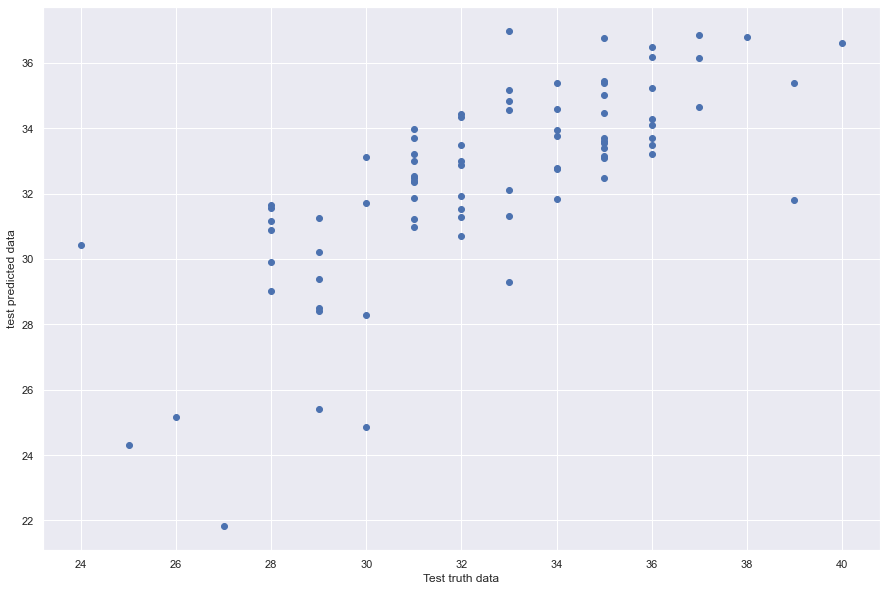

In [108]:
plt.scatter(y_test, reg_predict) ### showing linear relationship, model is good
plt.xlabel("Test truth data")
plt.ylabel("test predicted data") ## here x is inc when y is inc

In [109]:
## residual
residuals=y_test-reg_predict

In [110]:
residuals

24    -1.993099
6     -2.158485
153   -1.825270
211    1.904472
198    3.393616
         ...   
180    1.235239
5     -2.217813
56     0.778006
125   -3.117176
148    2.288795
Name: Temperature, Length: 81, dtype: float64

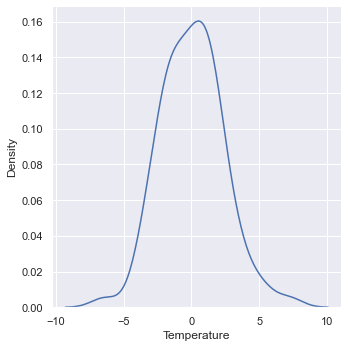

In [111]:
sns.displot(residuals, kind="kde")  ## should follow a normal distribution, but this is slighly right skewed,
#outliers are present on right

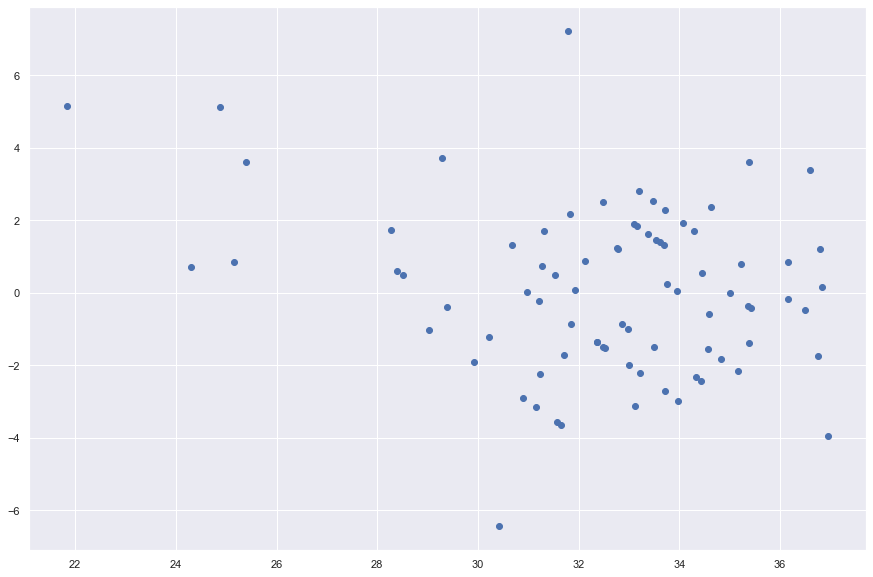

In [112]:
## scatter plot with predictions and residual
## uniform distribution
plt.scatter(reg_predict, residuals) ## randomly distribution, uniform distribution (no shape)
##model is good

In [113]:
## performance metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test, reg_predict))
print(mean_absolute_error(y_test, reg_predict))
print(np.sqrt(mean_squared_error(y_test, reg_predict)))

5.214767184968105
1.805597055363276
2.2835864741603515


In [114]:
## r squared and adj r squared   
## adj r will always be less than r squared
from sklearn.metrics import r2_score
score=r2_score(y_test, reg_predict)
score

0.5144871931236592

In [115]:
## adj r squared
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.42880846249842264

# Ridge Regression 

In [117]:
## ridge regression 
from sklearn.linear_model import Ridge
ridge=Ridge()

In [118]:
ridge.fit(X_train, y_train)

Ridge()

In [121]:
ridge_predict=ridge.predict(X_test)
ridge_predict

array([32.99333276, 35.09969135, 34.76742978, 33.06019874, 36.56721921,
       31.86436427, 35.35134597, 28.40669446, 31.6640337 , 29.30072061,
       29.02522412, 32.87396201, 32.37593073, 32.52565918, 34.34823693,
       31.80470561, 36.73483389, 25.47258556, 32.80928769, 33.45277464,
       31.26969531, 28.27134222, 34.43420241, 29.38805771, 36.79460361,
       25.22853471, 33.68588893, 33.70323911, 33.59652216, 35.28411753,
       33.99214035, 31.68672911, 32.51071248, 33.2153904 , 32.34947372,
       31.58812674, 30.15833009, 34.47361394, 32.04891227, 21.92445444,
       34.0906883 , 34.95412187, 31.27107136, 24.93325892, 36.0769869 ,
       32.94542097, 31.24078828, 30.7200856 , 35.33038546, 34.32232482,
       36.89187529, 31.20326564, 30.98868932, 34.66409991, 33.45399628,
       32.64185478, 36.49207349, 30.45136482, 30.87588591, 36.16710535,
       33.87494307, 28.54179892, 33.14661577, 31.82767559, 31.9547539 ,
       24.3426103 , 33.53054969, 29.91857301, 36.71522266, 34.73

Text(0, 0.5, 'test predicted data')

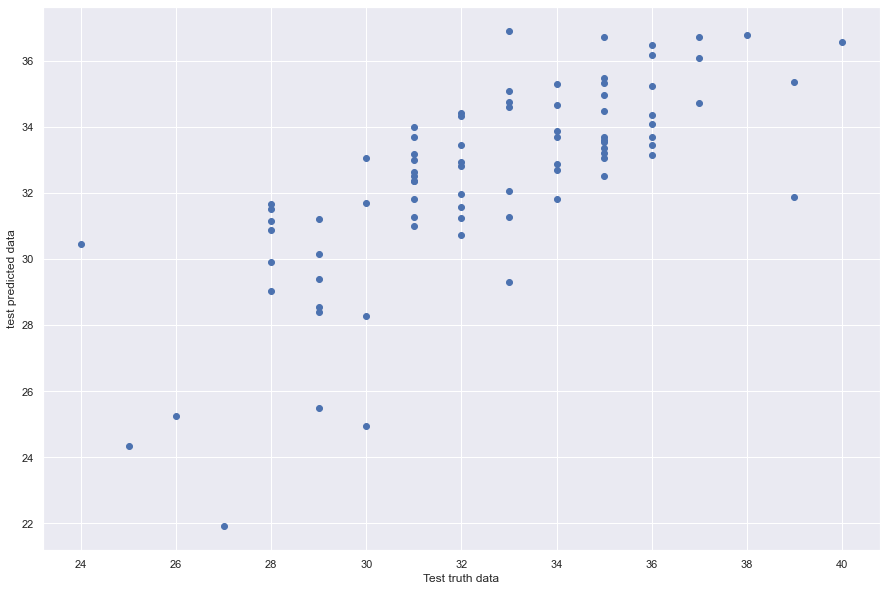

In [122]:
##Assumptions of linear regression
plt.scatter(y_test, ridge_predict) ### showing linear relationship, model is good
plt.xlabel("Test truth data")
plt.ylabel("test predicted data") ## here x is inc when y is inc

In [124]:
## residual
residuals=y_test-ridge_predict
residuals

24    -1.993333
6     -2.099691
153   -1.767430
211    1.939801
198    3.432781
         ...   
180    1.291576
5     -2.171158
56     0.755844
125   -3.069657
148    2.314288
Name: Temperature, Length: 81, dtype: float64

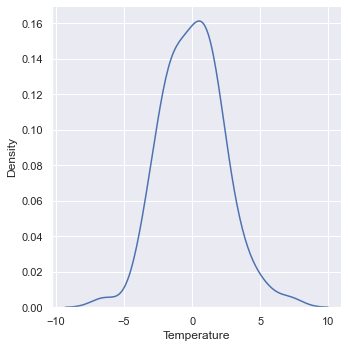

In [125]:
sns.displot(residuals, kind="kde")  ## should follow a normal distribution, but this is slighly right skewed,
#outliers are present on right

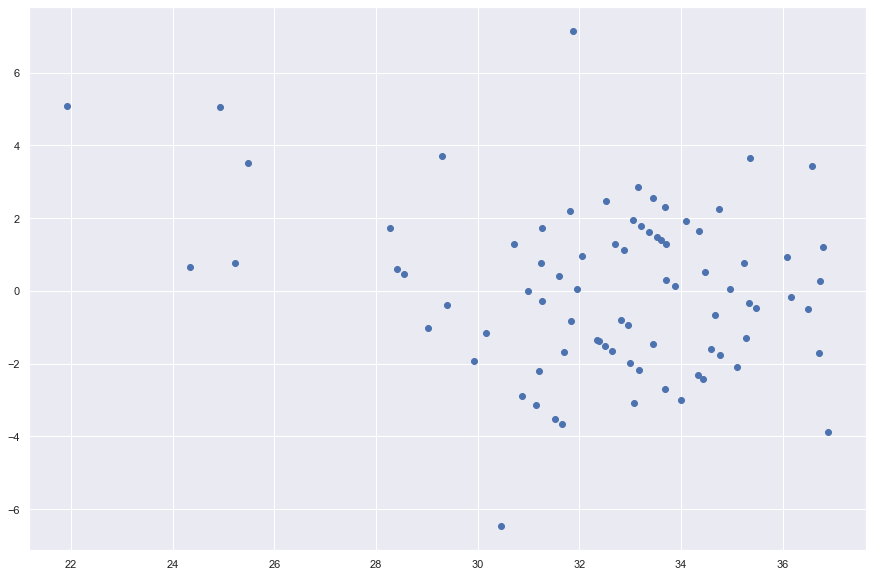

In [128]:
## scatter plot with predictions and residual
## uniform distribution
plt.scatter(ridge_predict, residuals) ## randomly distribution, uniform distribution (no shape)
##model is good

In [129]:
## performance metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test, ridge_predict))
print(mean_absolute_error(y_test, ridge_predict))
print(np.sqrt(mean_squared_error(y_test, ridge_predict)))

5.155638526993969
1.7980004559151934
2.270603119656531


In [130]:
## r squared and adj r squared   
## adj r will always be less than r squared
from sklearn.metrics import r2_score
score=r2_score(y_test, ridge_predict)
score

0.5199922750729753

In [131]:
## adj r squared
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.43528502949761805

In [132]:
## Lasso Regression 
from sklearn.linear_model import Lasso

In [133]:
lasso=Lasso()

In [134]:
lasso

Lasso()

In [135]:
lasso.fit(X_train, y_train)

Lasso()

In [136]:
## print the coefficient and intercept
print(lasso.coef_)

[-0.         -0.          0.         -0.62324302 -0.         -0.
  1.25581509  0.          0.          0.          0.          0.        ]


In [137]:
lasso.intercept_

31.98159509202454

In [138]:
##prediction
lasso_predict=lasso.predict(X_test)

In [139]:
lasso_predict

array([32.78381104, 33.3358205 , 33.53835729, 32.69192045, 34.21212444,
       31.67725854, 34.06518855, 28.84685412, 30.99078013, 30.10392027,
       31.06631475, 32.42020469, 32.80398907, 32.31726957, 33.37068778,
       32.46976122, 34.57875298, 27.38502889, 32.29240264, 33.12192792,
       31.62499111, 29.79900395, 33.65042591, 30.31559056, 34.62053146,
       28.73534108, 32.5527626 , 32.85187888, 32.99739235, 33.91411932,
       33.25917474, 31.27076256, 32.79238897, 32.82670067, 32.58151856,
       32.71432078, 31.4254765 , 33.30564213, 31.04995877, 28.31033379,
       32.79596672, 32.94981382, 32.61305239, 27.48796401, 34.24588058,
       32.5549849 , 31.88399562, 30.89031162, 34.19107957, 33.50571231,
       34.39861652, 31.81203876, 31.79074958, 32.97252542, 33.46393383,
       32.11393291, 34.88311373, 32.60669677, 31.06489233, 34.43070593,
       33.14932842, 31.16313854, 33.31119788, 32.23069043, 32.12966634,
       27.92377153, 33.05552681, 31.68837004, 34.34770454, 34.11

Text(0, 0.5, 'test predicted data')

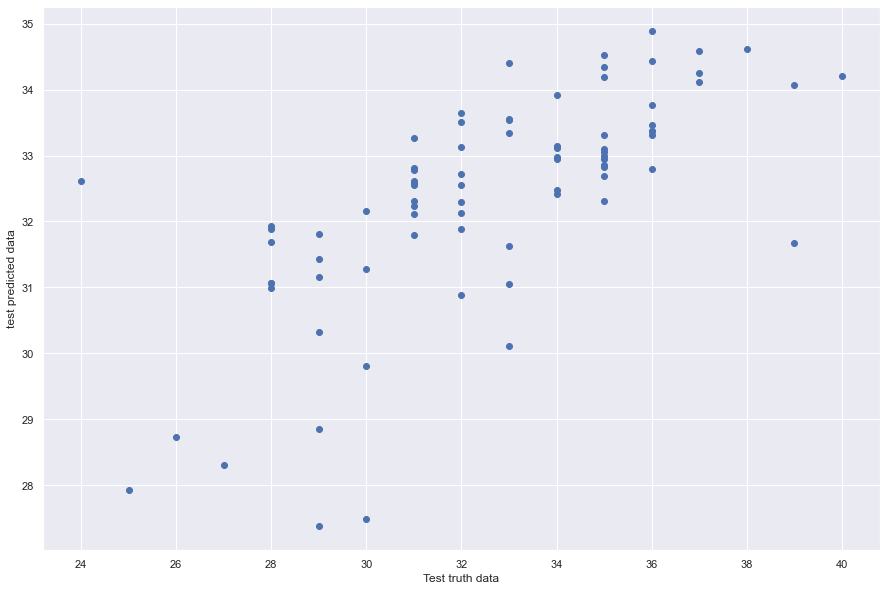

In [141]:
plt.scatter(y_test, lasso_predict) ### showing linear relationship, model is good
plt.xlabel("Test truth data")
plt.ylabel("test predicted data") ## here x is inc when y is inc

In [142]:
## residual
residuals=y_test-lasso_predict
residuals

24    -1.783811
6     -0.335821
153   -0.538357
211    2.308080
198    5.787876
         ...   
180    0.884428
5     -1.305114
56     2.230039
125   -2.157622
148    2.629312
Name: Temperature, Length: 81, dtype: float64

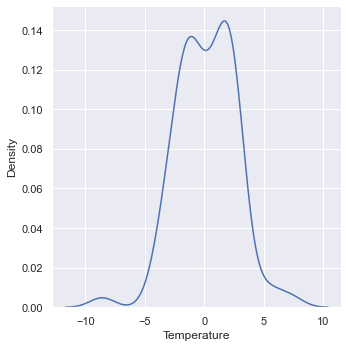

In [143]:
sns.displot(residuals, kind="kde")  ## should follow a normal distribution, but this is slighly right skewed,
#outliers are present on right

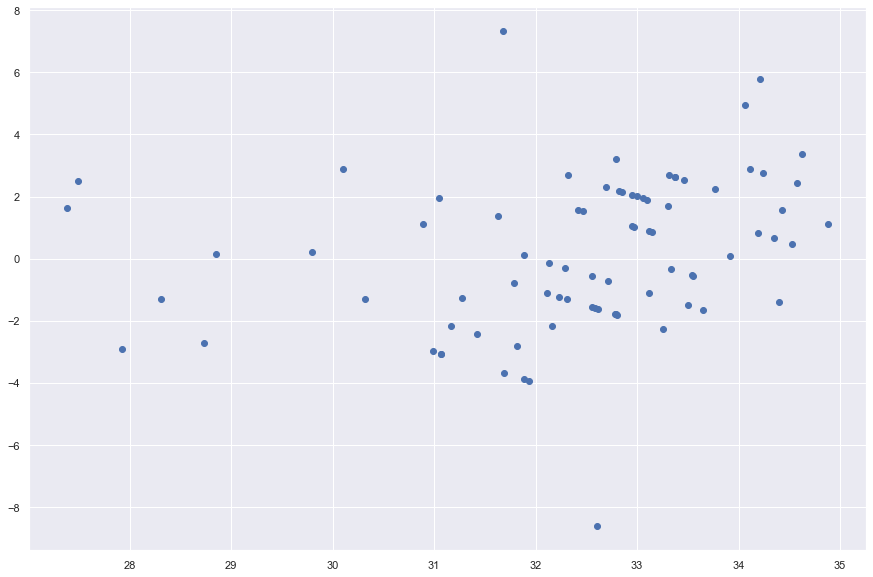

In [144]:
## scatter plot with predictions and residual
## uniform distribution
plt.scatter(lasso_predict, residuals) ## randomly distribution, uniform distribution (no shape)
##model is good

In [145]:
## performance metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test, lasso_predict))
print(mean_absolute_error(y_test, lasso_predict))
print(np.sqrt(mean_squared_error(y_test, lasso_predict)))

6.085458745527471
1.9978776414662665
2.4668722596696147


In [146]:
## r squared and adj r squared   
## adj r will always be less than r squared
from sklearn.metrics import r2_score
score=r2_score(y_test, lasso_predict)
score

0.4334228064508907

In [147]:
## adj r squared
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.33343859582457736

# ElasticNet Regression

In [148]:
from sklearn.linear_model import ElasticNet

In [149]:
elastic=ElasticNet()

In [150]:
elastic

ElasticNet()

In [151]:
elastic.fit(X_train, y_train)

ElasticNet()

In [152]:
## print the coefficient and intercept
print(elastic.coef_)

[-0.         -0.          0.         -0.68660819 -0.10729519 -0.01133909
  0.87161383  0.10730334  0.          0.24710703  0.03076538  0.16641415]


In [153]:
elastic.intercept_

31.98159509202454

In [155]:
##prediction
elastic_predict=elastic.predict(X_test)

In [156]:
elastic_predict

array([32.65256996, 33.25056558, 33.35664726, 32.54205018, 34.69525792,
       31.63470292, 34.18134196, 29.02965354, 30.78570894, 30.13252743,
       30.45231109, 32.31544376, 32.56189723, 32.17489562, 33.83320104,
       32.21088442, 35.64395188, 27.8812157 , 32.07683621, 32.8901327 ,
       31.08820729, 29.67645915, 33.67039069, 30.11852367, 35.39011198,
       28.87997656, 32.33069454, 32.82341449, 32.61035675, 34.16641541,
       33.29924587, 31.22742866, 32.68528639, 33.03186089, 32.16811667,
       32.44762109, 30.87567129, 33.23168415, 31.06207802, 27.9644791 ,
       32.74801743, 32.75694081, 32.24725645, 27.82670749, 34.70745611,
       32.35515881, 31.6432799 , 30.77367885, 34.28175003, 33.57529939,
       35.63209843, 31.30433666, 31.51696316, 33.59539218, 33.60290528,
       32.23503043, 36.10463476, 32.05723319, 30.86007637, 34.88440778,
       33.04643393, 30.82269541, 33.46716217, 31.88611065, 31.77279988,
       27.9685264 , 32.95696894, 31.29725359, 35.38485687, 34.10

Text(0, 0.5, 'test predicted data')

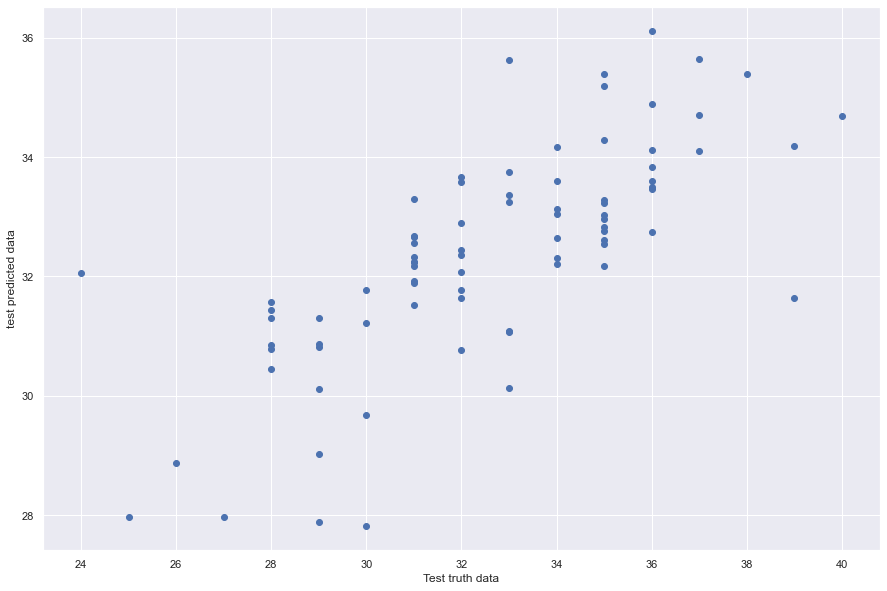

In [157]:
plt.scatter(y_test, elastic_predict) ### showing linear relationship, model is good
plt.xlabel("Test truth data")
plt.ylabel("test predicted data") ## here x is inc when y is inc

In [158]:
## residual
residuals=y_test-elastic_predict
residuals

24    -1.652570
6     -0.250566
153   -0.356647
211    2.457950
198    5.304742
         ...   
180    0.865689
5     -0.925029
56     1.880581
125   -1.778840
148    2.504318
Name: Temperature, Length: 81, dtype: float64

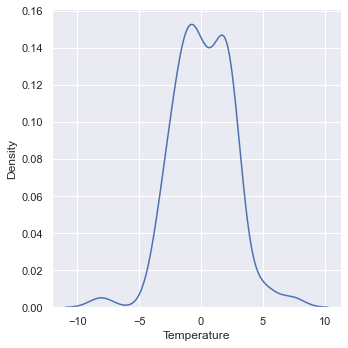

In [159]:
sns.displot(residuals, kind="kde")  ## should follow a normal distribution, but this is slighly right skewed,
#outliers are present on right

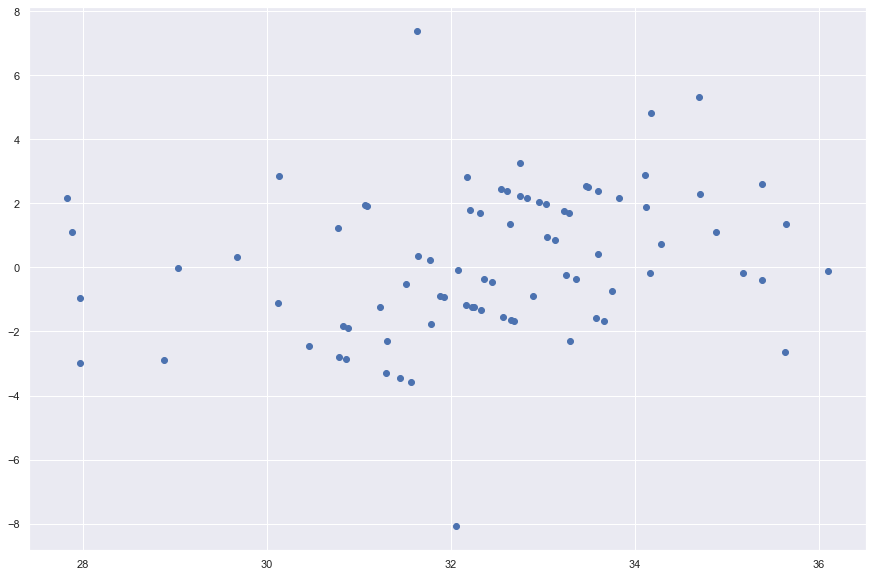

In [160]:
## scatter plot with predictions and residual
## uniform distribution
plt.scatter(elastic_predict, residuals) ## randomly distribution, uniform distribution (no shape)
##model is good

In [161]:
## performance metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test, elastic_predict))
print(mean_absolute_error(y_test, elastic_predict))
print(np.sqrt(mean_squared_error(y_test, elastic_predict)))

5.404715261130963
1.8491761105206956
2.3248043490003547


In [162]:
## r squared and adj r squared   
## adj r will always be less than r squared
from sklearn.metrics import r2_score
score=r2_score(y_test, elastic_predict)
score

0.49680237223953116

In [163]:
## adj r squared
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.40800279087003677

# conclusion
## Out of all the above four regression models, linear Regression has performed well and has learnt the model and predicted the temperature well.
